## Importing Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [169]:
test_dt=pd.read_csv('fraudTest.csv')
train_dt=pd.read_csv('fraudTrain.csv')

In [170]:
train_dt

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

In [171]:
test_dt

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

## Information about dataset

In [172]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [173]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Checking Null Values

In [174]:
train_dt.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [175]:
test_dt.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [176]:
test_dt['data']='Test'
train_dt['data']='Train'

## MERGE TEST AND TRAIN DATA 

In [177]:
df=pd.concat([train_dt,test_dt],axis=0)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [179]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) #drop unnecessary

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
 22  data               

## DESCRIPTIVE ANLAYSIS 

In [181]:
df.describe().T

count          mean           std           min           25%  \
cc_num      1852394.0  4.173860e+17  1.309115e+18  6.041621e+10  1.800429e+14   
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  9.640000e+00   
zip         1852394.0  4.881326e+04  2.688185e+04  1.257000e+03  2.623700e+04   
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  3.466890e+01   
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -9.679800e+01   
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  7.410000e+02   
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.343017e+09   
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  3.474012e+01   
merch_long  1852394.0 -9.022794e+01  1.375969e+01 -1.666716e+02 -9.689944e+01   
is_fraud    1852394.0  5.210015e-03  7.199217e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.745000e+01  8.310000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.992100e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.443000e+03  2.032800e+04  2.906700e+06  
unix_time   1.357089e+09  1.374581e+09  1.388534e+09  
merch_lat   3.936890e+01  4.195626e+01  6.751027e+01  
merch_long -8.744069e+01 -8.024511e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

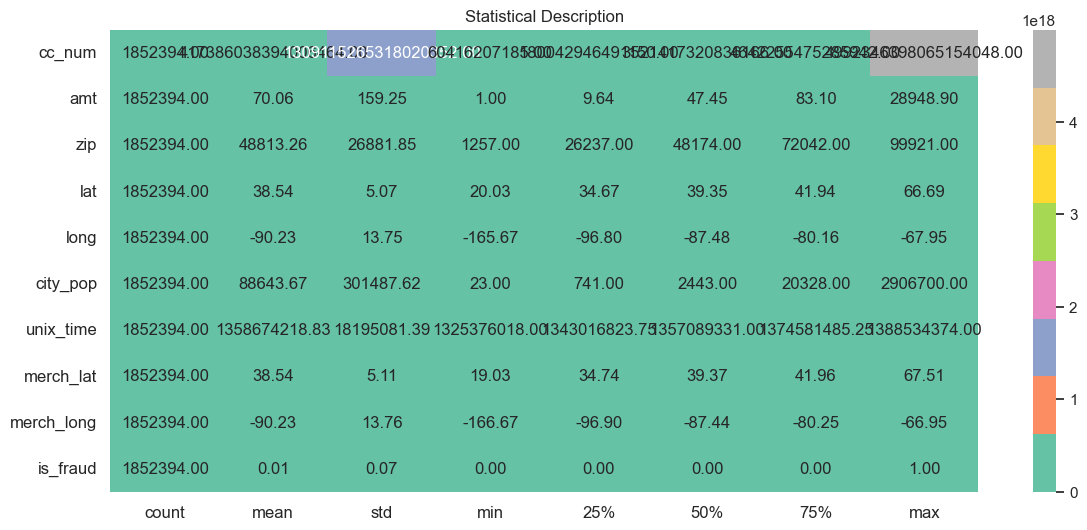

In [182]:
def descriptive_stats(dt):
    desc = dt.describe().round(2).T
    desc_df = pd.DataFrame(index=dt.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(df)

## CHECK FOR  DUPLICATES 

In [183]:
duplicates=df.duplicated().sum()
duplicates

0

In [184]:
### no duplicates

## FINDING UNIQUE VALUES 

In [185]:
#unique values
for i in df.columns:
    print('********************************',i,'**********************************')
    print()
    print(set(df[i].tolist()))

******************************** trans_date_trans_time **********************************



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{4110266553600176127, 3524574586339330, 4045036286570100739, 3596217206093829, 213136802746375, 4683520018489354, 342035762534413, 4006047418382, 4348786085525522, 4561546772499, 4788103653396, 30596478689301, 4450831335606294, 3543299015720986, 3517527805128735, 4764202053279782, 4134456652433447, 4124536010991657, 4989847570577635369, 4018105808392773675, 4500002361389, 3502088871723054, 371683116218417, 6535328428560433, 4488941175228467, 2706977570537524, 6544734391390261, 38057513087029, 370818583810103, 4087542780207162, 30248898834493, 6011518448009279, 3545578418030657, 3585052663373890, 3541554378551366, 4714017207228610634, 4162872756672112717, 3531129874770000, 2610529083834453, 565399283797, 4129767952109660, 213153151785052, 3560797065840735, 345225948700767, 3520550088202337, 180097223252063, 4570636521433188, 3551217896304745, 4477156602511939689, 30092964733035, 4951647200979051, 4119762878330989, 3506040590383211, 3550412175018089, 4295296907373, 213107169859697, 35347

{'F', 'M'}
******************************** street **********************************

{'4005 Dana Glens', '91542 Marissa Shores Apt. 053', '273 Phillip Throughway', '24255 Bryan Square', '05050 Rogers Well Apt. 439', '257 Victor Stravenue', '646 Louis Fort Apt. 665', '755 Moses Harbor', '169 Edward Inlet', '083 Karen Island Apt. 656', '2851 Foster Shoals', '2989 Murray Inlet', '0356 Sarah Light', '9612 Robert Light Apt. 340', '35822 Clayton Street Apt. 679', '10376 Bullock Rapid', '79209 Gary Dale', '401 Escobar Port', '3304 Hernandez Run', '055 Stephanie Turnpike Suite 559', '8030 Walker Heights', '024 Williams Parkway', '7483 Navarro Flats', '9599 Washington Field Suite 238', '3603 Mitchell Court', '22084 Smith Roads Suite 776', '537 Rice Square Suite 040', '611 Michael Rue', '329 Michael Extension', '862 Anderson Highway', '3872 Matthew Skyway', '5939 Garcia Forges Suite 297', '8617 Holmes Terrace Suite 651', '7812 Shane Shoals Apt. 607', '376 Brown Courts', '639 Cruz Islands', '78

{67584, 18433, 86018, 98304, 38915, 36869, 47110, 38922, 32780, 61454, 18446, 32784, 73754, 57374, 79906, 84002, 84003, 16421, 61477, 38949, 10280, 30756, 16428, 63533, 92210, 67635, 45106, 59448, 43070, 43076, 63565, 71762, 57426, 75858, 30803, 14425, 61530, 55388, 43102, 57439, 41056, 45150, 55403, 92267, 49259, 14445, 4210, 84087, 61560, 12410, 43136, 90240, 4226, 12419, 8323, 80005, 2180, 8324, 55428, 34953, 90250, 41101, 80014, 82063, 65680, 14479, 77971, 80019, 80021, 59542, 82072, 43160, 20634, 71832, 8350, 75934, 39073, 32935, 12455, 12460, 71854, 14510, 37040, 63665, 12466, 14522, 4286, 4287, 22719, 32960, 88256, 14532, 14537, 39113, 75980, 35022, 20687, 65745, 78040, 12508, 6365, 10463, 28901, 76008, 35049, 59632, 39157, 12534, 80120, 14586, 45307, 51453, 88325, 10504, 80138, 67851, 37132, 4364, 82190, 33040, 76048, 76050, 37138, 45331, 71960, 22810, 31003, 45342, 12575, 49440, 78113, 90403, 88355, 10533, 41254, 22824, 20776, 6441, 57641, 6444, 82221, 37165, 24878, 39211, 945

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Encoding

In [186]:
for i in df.select_dtypes(include='object').columns:
    print(f"=="*25,{i},"=="*25)
    print(df[i].value_counts())
    print('='*75)

================================================== {'trans_date_trans_time'} ==================================================
2019-04-22 16:02:01    4
2020-06-02 12:47:07    4
2020-10-05 19:37:49    4
2020-06-01 01:37:47    4
2020-12-17 20:36:39    4
                      ..
2019-09-21 09:31:54    1
2019-09-21 09:31:49    1
2019-09-21 09:31:24    1
2019-09-21 09:29:49    1
2020-12-31 23:59:34    1
Name: trans_date_trans_time, Length: 1819551, dtype: int64
================================================== {'merchant'} ==================================================
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hah

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
 22  data               

In [188]:
df.drop(['first','last','gender','city','state','street','zip','city_pop','job','dob','trans_num','unix_time'],axis=1,inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   lat                    float64
 6   long                   float64
 7   merch_lat              float64
 8   merch_long             float64
 9   is_fraud               int64  
 10  data                   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 169.6+ MB


In [190]:
df['tt']=pd.to_datetime(df['trans_date_trans_time']).dt.hour

In [191]:
df['transc_day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   lat                    float64
 6   long                   float64
 7   merch_lat              float64
 8   merch_long             float64
 9   is_fraud               int64  
 10  data                   object 
 11  tt                     int64  
 12  transc_day             int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 197.9+ MB


In [193]:
df['tt']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: tt, Length: 1852394, dtype: int64

In [194]:
df['transc_day']

0         1
1         1
2         1
3         1
4         1
         ..
555714    3
555715    3
555716    3
555717    3
555718    3
Name: transc_day, Length: 1852394, dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   lat                    float64
 6   long                   float64
 7   merch_lat              float64
 8   merch_long             float64
 9   is_fraud               int64  
 10  data                   object 
 11  tt                     int64  
 12  transc_day             int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 197.9+ MB


In [196]:
df.drop(['trans_date_trans_time'],axis=1,inplace=True)

In [197]:
df['merchant'].value_counts()

fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: merchant, Length: 693, dtype: int64

In [198]:
#LABEL ENCODING
for i in df.select_dtypes(include='object').columns:
    df[i]=df[i].astype('category')
    df[i]=df[i].cat.codes

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    int16  
 2   category    int8   
 3   amt         float64
 4   lat         float64
 5   long        float64
 6   merch_lat   float64
 7   merch_long  float64
 8   is_fraud    int64  
 9   data        int8   
 10  tt          int64  
 11  transc_day  int64  
dtypes: float64(5), int16(1), int64(4), int8(2)
memory usage: 148.4 MB


In [200]:
df.head()

cc_num  merchant  category     amt      lat      long  merch_lat  \
0  2703186189652095       514         8    4.97  36.0788  -81.1781  36.011293   
1      630423337322       241         4  107.23  48.8878 -118.2105  49.159047   
2    38859492057661       390         0  220.11  42.1808 -112.2620  43.150704   
3  3534093764340240       360         2   45.00  46.2306 -112.1138  47.034331   
4   375534208663984       297         9   41.96  38.4207  -79.4629  38.674999   

   merch_long  is_fraud  data  tt  transc_day  
0  -82.048315         0     1   0           1  
1 -118.186462         0     1   0           1  
2 -112.154481         0     1   0           1  
3 -112.561071         0     1   0           1  
4  -78.632459         0     1   0           1

## Checking Outliers

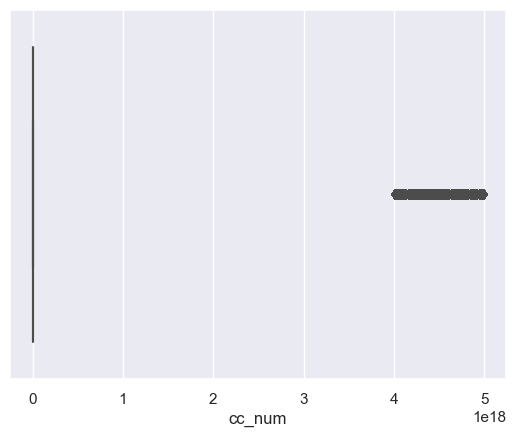

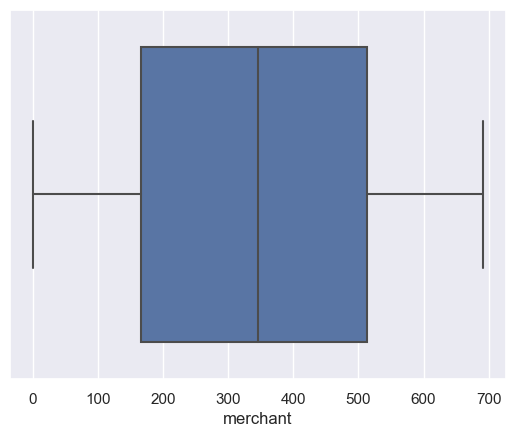

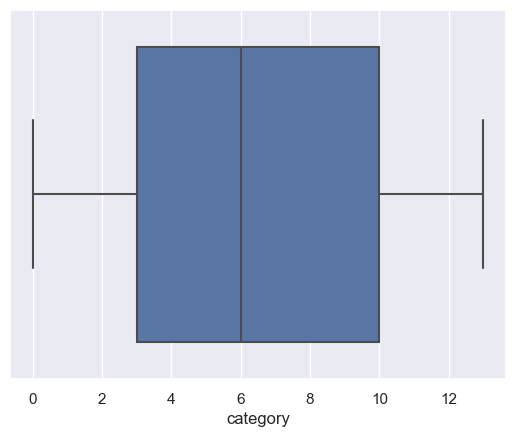

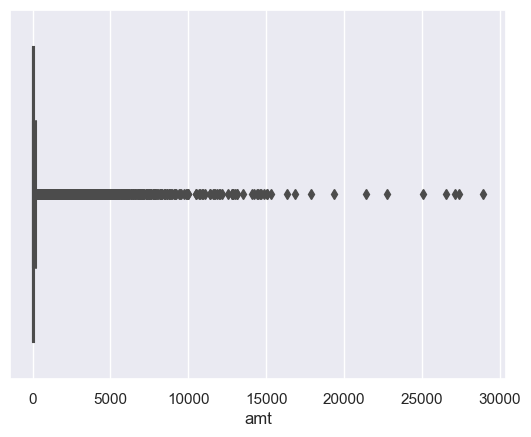

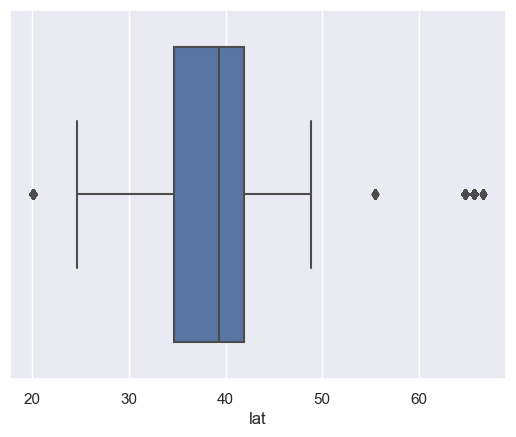

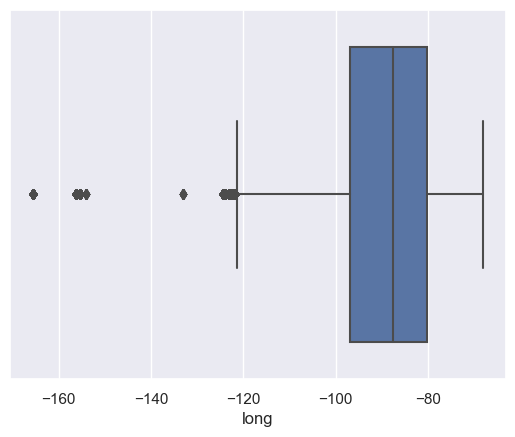

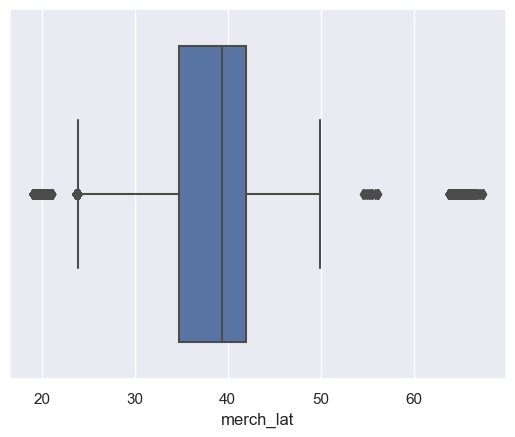

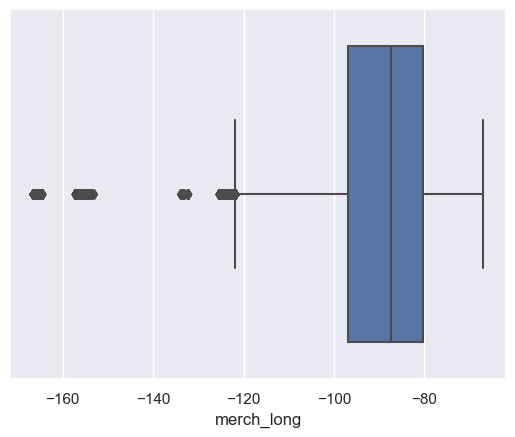

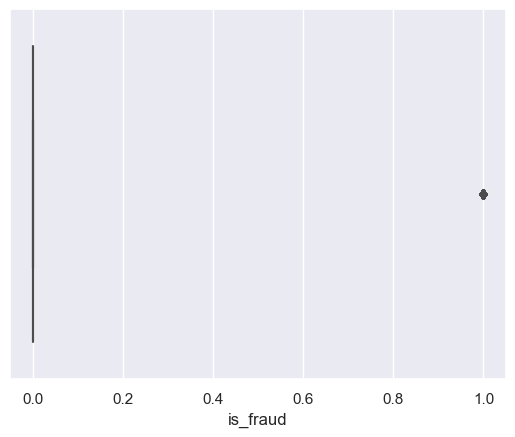

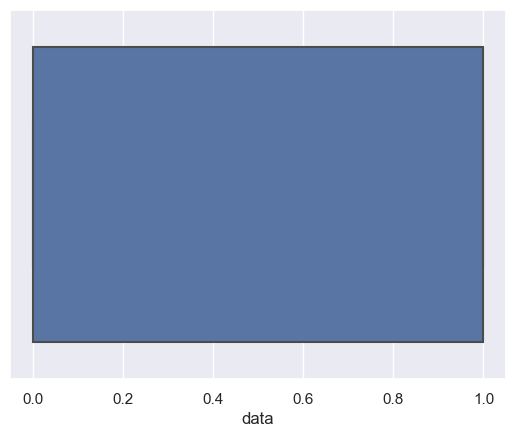

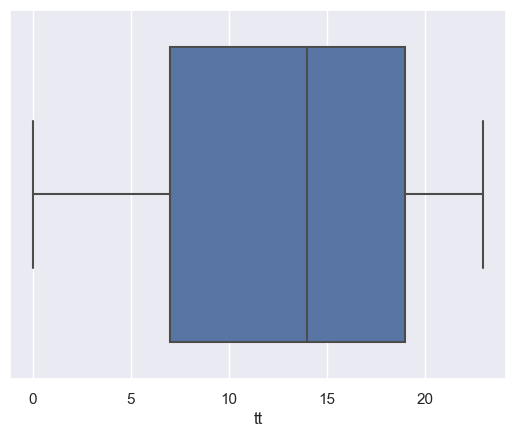

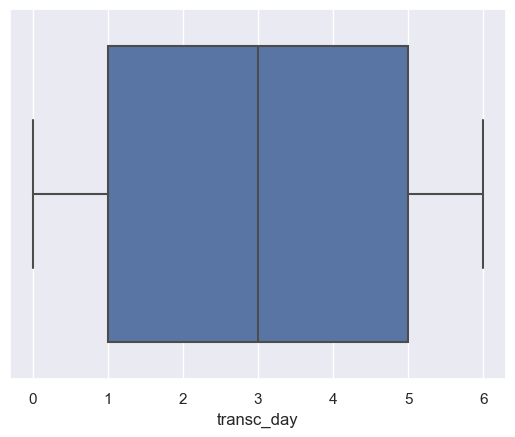

In [201]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### No outlier handling is needed 

## split into dv and idv

In [202]:
x=df.drop('is_fraud',axis=1)
y=df[['is_fraud']]

In [203]:
x.head()

cc_num  merchant  category     amt      lat      long  merch_lat  \
0  2703186189652095       514         8    4.97  36.0788  -81.1781  36.011293   
1      630423337322       241         4  107.23  48.8878 -118.2105  49.159047   
2    38859492057661       390         0  220.11  42.1808 -112.2620  43.150704   
3  3534093764340240       360         2   45.00  46.2306 -112.1138  47.034331   
4   375534208663984       297         9   41.96  38.4207  -79.4629  38.674999   

   merch_long  data  tt  transc_day  
0  -82.048315     1   0           1  
1 -118.186462     1   0           1  
2 -112.154481     1   0           1  
3 -112.561071     1   0           1  
4  -78.632459     1   0           1

In [204]:
y.head()

is_fraud
0         0
1         0
2         0
3         0
4         0

## split train and test data

In [205]:
train=df[df['data']==1]

In [206]:
test=df[df['data']==0]

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  int16  
 2   category    1296675 non-null  int8   
 3   amt         1296675 non-null  float64
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   merch_lat   1296675 non-null  float64
 7   merch_long  1296675 non-null  float64
 8   is_fraud    1296675 non-null  int64  
 9   data        1296675 non-null  int8   
 10  tt          1296675 non-null  int64  
 11  transc_day  1296675 non-null  int64  
dtypes: float64(5), int16(1), int64(4), int8(2)
memory usage: 103.9 MB


In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  int64  
 1   merchant    555719 non-null  int16  
 2   category    555719 non-null  int8   
 3   amt         555719 non-null  float64
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   merch_lat   555719 non-null  float64
 7   merch_long  555719 non-null  float64
 8   is_fraud    555719 non-null  int64  
 9   data        555719 non-null  int8   
 10  tt          555719 non-null  int64  
 11  transc_day  555719 non-null  int64  
dtypes: float64(5), int16(1), int64(4), int8(2)
memory usage: 44.5 MB


In [209]:
train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

## Balacing data

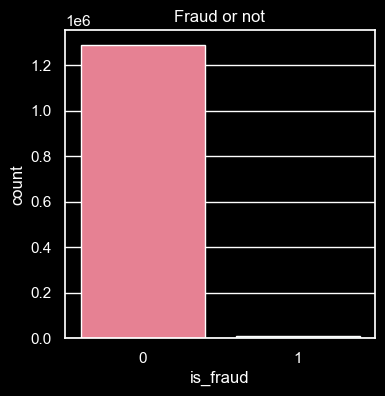

In [210]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= train.is_fraud, data= train, palette ='husl')
ax.set_title('Fraud or not')
plt.show()

In [211]:
x_af=train.drop('is_fraud',axis=1)
y_af=train[['is_fraud']]

In [212]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_af,y_af)

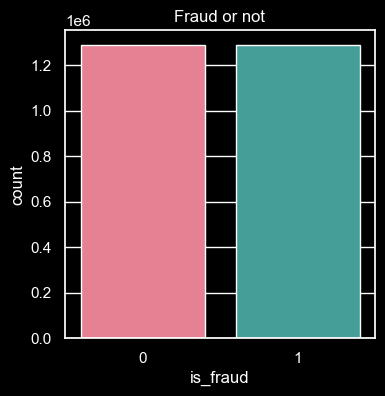

In [213]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= y_smote.is_fraud, data= y_smote, palette ='husl')
ax.set_title('Fraud or not')
plt.show()

## Feature scaling only train data

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_smote)

## Split train and test data from train data for model building

In [218]:
x_train=x_sc
y_train=y_smote
x_test=test.drop('is_fraud',axis=1)
y_test=test[['is_fraud']]

## MODEL BUILDING

Trainging Accuracy Score : 0.8679428375953812
Test Accuracy Score : 0.9961401355721147

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.82      0.95      0.88   1289169
           1       0.94      0.79      0.86   1289169

    accuracy                           0.87   2578338
   macro avg       0.88      0.87      0.87   2578338
weighted avg       0.88      0.87      0.87   2578338

                Classification_report_Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

confusion_matrix_Test : 
 
 [[553574      0]
 [  2145      0]]
confusion_matrix_Train : 
 
 [[1221828   67341]
 [ 273147 1016022]]


Text(0.5, 1.0, 'confusion_matrix_Test')

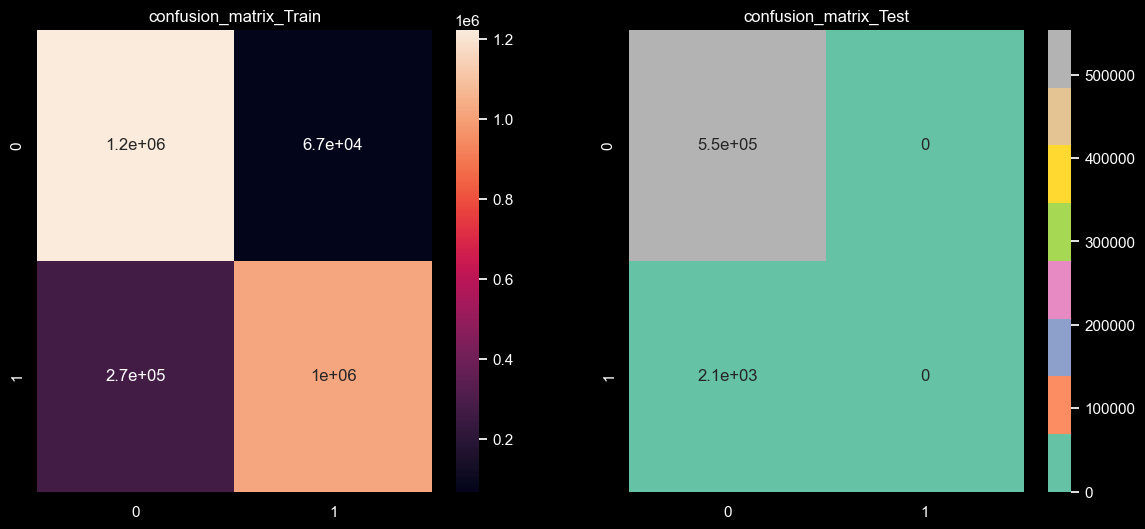

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logit=LogisticRegression()
logit.fit(x_train,y_train)
y_pred_logit_train=logit.predict(x_train)
y_pred_logit_test=logit.predict(x_test)
Train_acc = accuracy_score(y_train, y_pred_logit_train)
Test_acc = accuracy_score(y_test, y_pred_logit_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc,)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, y_pred_logit_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, y_pred_logit_test))
print('=='*35)
cm_train= confusion_matrix(y_train, y_pred_logit_train)
cm_test = confusion_matrix(y_test, y_pred_logit_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

Trainging Accuracy Score : 1.0
Test Accuracy Score : 0.9961131435131785

                Classification_report_Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

                Classification_report_Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

confusion_matrix_Test : 
 
 [[553559     15]
 [  2145      0]]
confusion_matrix_Train : 
 
 [[1289169       0]
 [      0 1289169]]


Text(0.5, 1.0, 'confusion_matrix_Test')

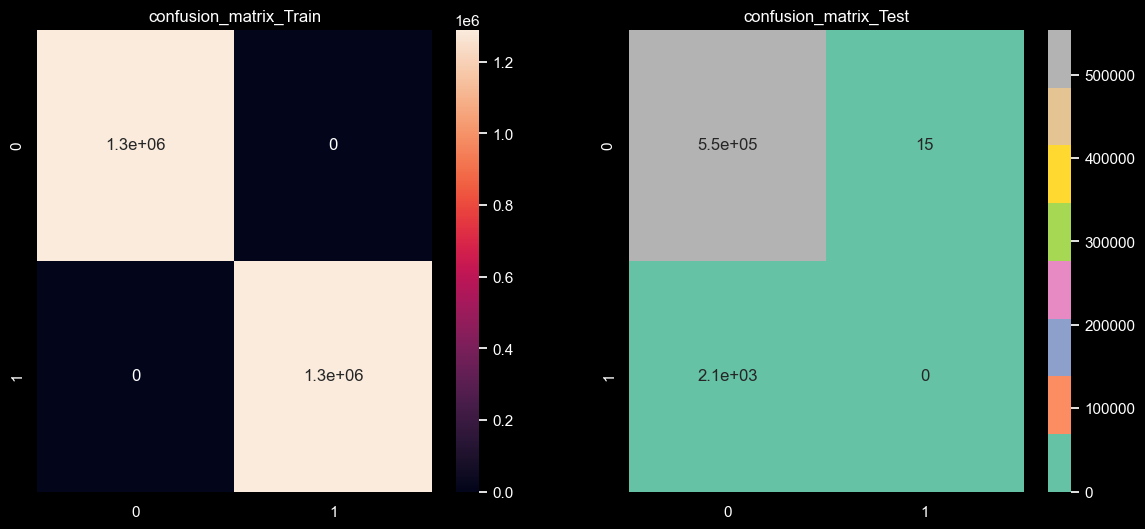

In [220]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)
Train_acc = accuracy_score(y_train, y_pred_rf_train)
Test_acc = accuracy_score(y_test, y_pred_rf_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc,)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, y_pred_rf_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, y_pred_rf_test))
print('=='*35)
cm_train= confusion_matrix(y_train, y_pred_rf_train)
cm_test = confusion_matrix(y_test, y_pred_rf_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

## Randomforest is performing better than logistic . so we can take random forest into consideration for predicting the test data from client

In [164]:
model=['logistic','randomforest']

In [222]:
acc_list=[0.99,0.99]

In [223]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':acc_list})

In [224]:
metrics_df

model_name  Accuracy
0      logistic      0.99
1  randomforest      0.99

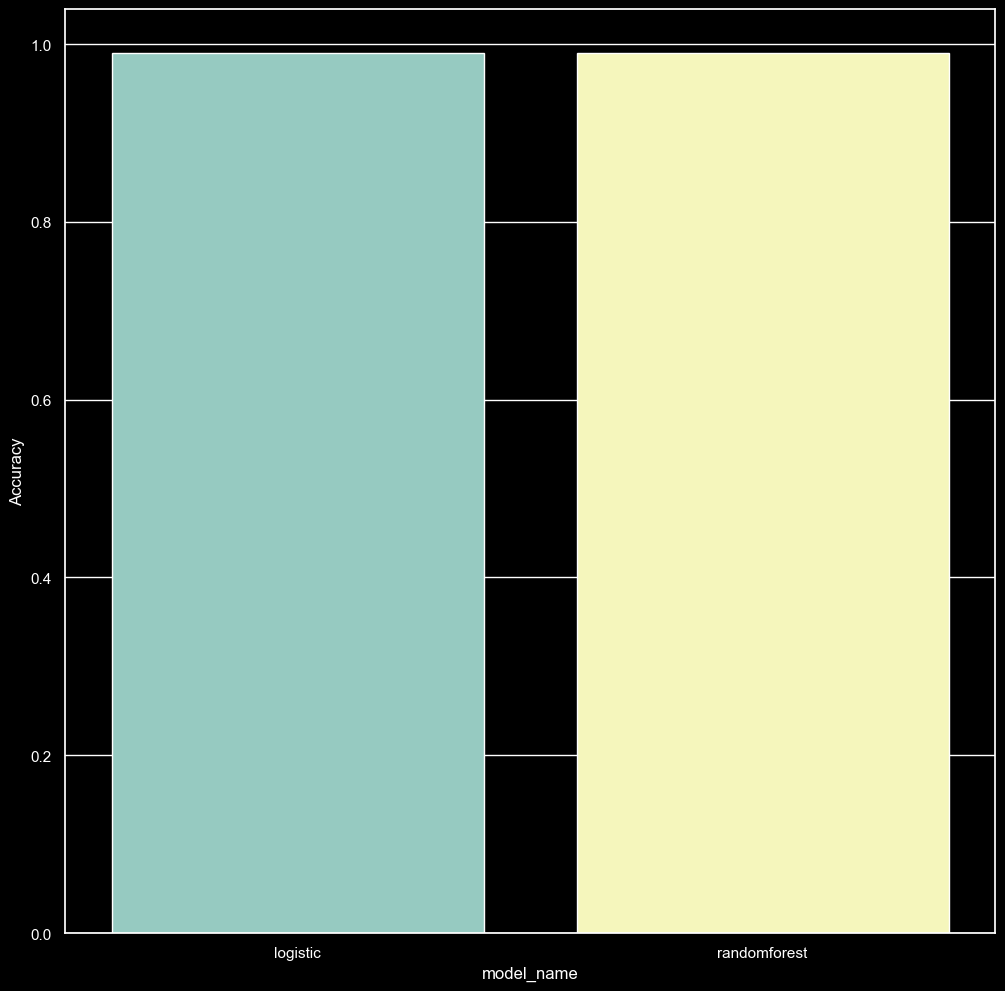

In [225]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Accuracy',data=metrics_df)
plt.show()

## ðŸŽ¯Summary:
#### We can observe that all models predicted and gave best accuracy among all of them RandomForest gave best train accuracy of 99% and test accuracy of 99% with 'NO VARIENCE'
### BEST MODEL:Randomforest